In [1]:
import msprime
import sys
import numpy as np
import seaborn as sns
from IPython.display import SVG
import matplotlib.pyplot as plt
from itertools import chain

In [2]:
#Reference Population
pop_configs = [
    msprime.PopulationConfiguration(sample_size=100)]
Ne = 100
recomb = 0.1
ts_ref = msprime.simulate(
    population_configurations=pop_configs,Ne = Ne,mutation_rate=0.25,recombination_rate = recomb,random_seed=11)
ts_ref.num_mutations

500

In [26]:
#ABC Function
def ABC(data,eps,pop_configs,Ne,recomb,prior="exponential",prior_parameters=1,iters=1000):
    ref_stat = (data.diversity(),data.Tajimas_D(),data.segregating_sites())
    samples = []
    if prior == "exponential":
        for i in range(0,iters):
            mutation_rate_sim = np.random.exponential(prior_parameters)
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    elif prior == "uniform":
        for i in range(0,iters):
            mutation_rate_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    elif prior == "gamma":
        for i in range(0,iters):
            mutation_rate_sim = np.random.gamma(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    return(samples)

In [27]:
#ABC Function
def ABCalt(data,eps,pop_configs,Ne,recomb,prior="exponential",prior_parameters=1,iters=1000):
    ref_stat = (data.diversity(),data.Tajimas_D(),data.segregating_sites())
    samples = []
    if prior == "exponential":
        for i in range(0,iters):
            mutation_rate_sim = np.random.exponential(prior_parameters)
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/ref_stat[0],ts_sim.Tajimas_D()/ref_stat[1],ts_sim.segregating_sites()/ref_stat[2])
            if np.linalg.norm(np.subtract((1,1,1),sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    elif prior == "uniform":
        for i in range(0,iters):
            mutation_rate_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/ref_stat[0],ts_sim.Tajimas_D()/ref_stat[1],ts_sim.segregating_sites()/ref_stat[2])
            if np.linalg.norm(np.subtract((1,1,1),sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    elif prior == "gamma":
        for i in range(0,iters):
            mutation_rate_sim = np.random.gamma(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,Ne=Ne,recombination_rate=recomb,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/ref_stat[0],ts_sim.Tajimas_D()/ref_stat[1],ts_sim.segregating_sites()/ref_stat[2])
            if np.linalg.norm(np.subtract((1,1,1),sim_stat)) < eps:
                samples.append(mutation_rate_sim)
    return(samples)

Trying different priors - results are similar, all underestimate mutation rate

In [28]:
%%time
#Exponential prior scale 0.2
iterations = 100000
eps = 10
prior= "exponential"
prior_parameters = 0.2
attempt1 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)

Wall time: 7min 31s


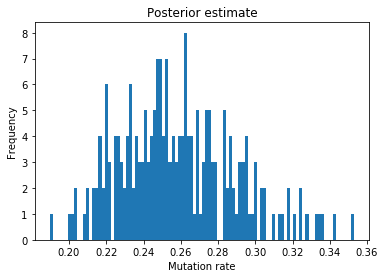

Acceptance probability : 0.00211


In [29]:
plt.hist(attempt1, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt1)/iterations)

In [30]:
%%time
#Exponential prior scale 0.1
iterations = 100000
eps = 10
prior = "exponential"
prior_parameters = 0.1
attempt2 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 6min 51s


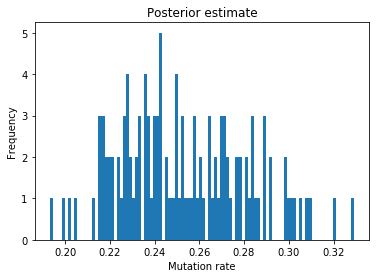

Acceptance probability : 0.00119


In [31]:
plt.hist(attempt2, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt2)/iterations)

In [32]:
%%time
#Gamma(0.5,1) prior
iterations = 100000
eps = 10
prior = "gamma"
prior_parameters = (0.5,1)
attempt3 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 9min 30s


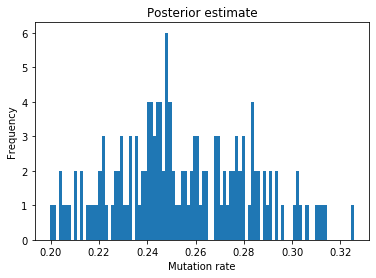

Acceptance probability : 0.00144


In [33]:
plt.hist(attempt3, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt3)/iterations)

In [34]:
%%time
#Uniform(0,1) prior
iterations = 100000
eps = 10
prior = "uniform"
prior_parameters = (0,1)
attempt4 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 9min 40s


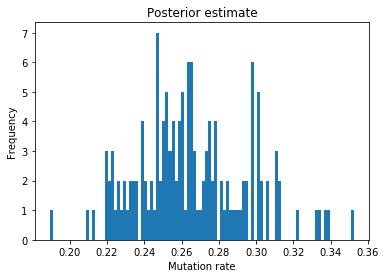

Acceptance probability : 0.00142


In [35]:
plt.hist(attempt4, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt4)/iterations)

In [42]:
%%time
#Exponential prior scale 0.1, standardized statistics
iterations = 100000
eps = 0.3
prior = "exponential"
prior_parameters = 0.1
attempt6 = ABCalt(ts_ref,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 6min


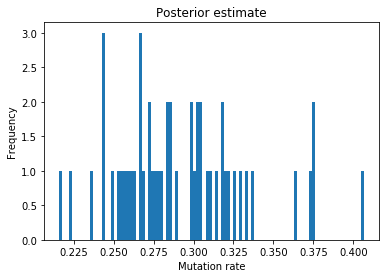

Acceptance probability : 0.00051


In [43]:
plt.hist(attempt6, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt6)/iterations)

Altering Sample Size

In [44]:
#Reference Population - Smaller sample size
pop_configs = [
    msprime.PopulationConfiguration(sample_size=20)]
Ne = 100
recomb = 0.1
ts_ref2 = msprime.simulate(
    population_configurations=pop_configs,Ne = Ne,mutation_rate=0.25,recombination_rate = recomb,random_seed=11)

In [48]:
%%time
#Exponential prior scale 1
iterations = 100000
eps = 1
prior = "exponential"
prior_parameters = 1
attempt8 = ABC(ts_ref2,eps=eps,pop_configs=pop_configs,Ne = Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)

Wall time: 10min 10s


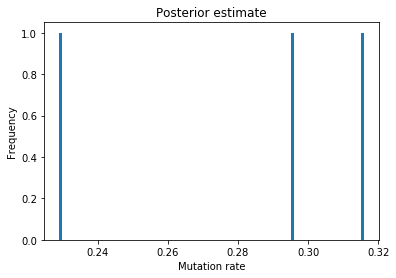

Acceptance probability : 3e-05


In [49]:
plt.hist(attempt8, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt8)/iterations)

In [50]:
#Reference Population - Larger sample size
pop_configs = [
    msprime.PopulationConfiguration(sample_size=300)]
Ne = 100
recomb = 0.1
ts_ref3 = msprime.simulate(
    population_configurations=pop_configs,Ne = Ne,mutation_rate=0.25,recombination_rate = recomb,random_seed=11)

In [51]:
%%time
#Exponential prior scale 1
iterations = 100000
eps = 10
prior = "exponential"
prior_parameters = 1
attempt9 = ABC(ts_ref3,eps=eps,pop_configs=pop_configs,Ne=Ne,recomb=recomb,prior=prior,prior_parameters=prior_parameters,iters=iterations)

Wall time: 15min 24s


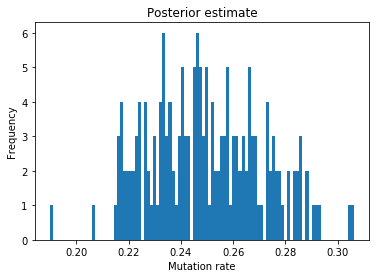

Acceptance probability : 0.00171


In [52]:
plt.hist(attempt9, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt9)/iterations)